In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

from einops import rearrange, reduce, repeat
from utils.timer import Timer

%matplotlib inline

In [2]:
print(os.getcwd())
path_data_base = '../data/'
path_images = os.path.join(path_data_base, 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset')
path_img_train = os.path.join(path_images, 'train')
path_img_test = os.path.join(path_images, 'test')

/is/sg2/bantic/working/repos/pneumonia-xray/code


In [4]:
meta = pd.read_csv(os.path.join(path_data_base, 'Chest_xray_Corona_Metadata.csv'))
meta.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [6]:
train = meta[meta['Dataset_type'] == 'TRAIN']
test = meta[meta['Dataset_type'] == 'TEST']
n_train = len(train)
n_test = len(test)

print(f'{n_train=} {n_test=}')

n_train=5286 n_test=624


In [15]:
sample_train_images = list(os.walk(path_img_train))[0][2][8:16]
sample_train_images = list(map(lambda x: os.path.join(path_img_train, x), sample_train_images))

sample_test_images = list(os.walk(path_img_test))[0][2][:8]
sample_test_images = list(map(lambda x: os.path.join(path_img_train, x), sample_test_images))

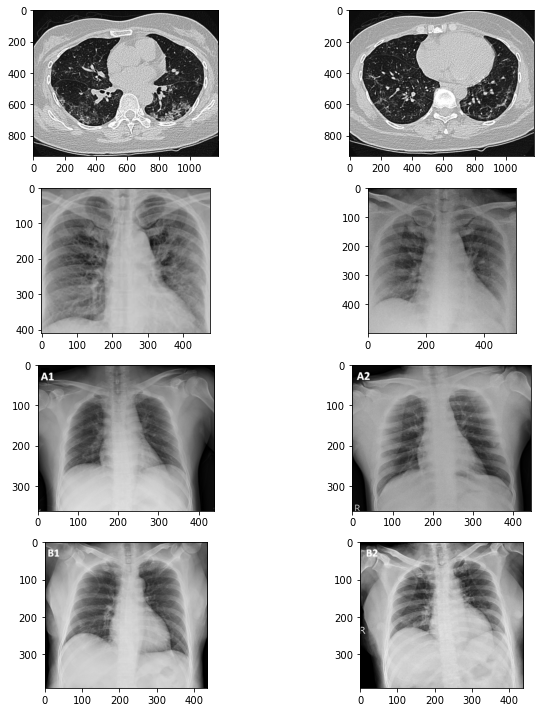

In [16]:
plt.figure(figsize = (10,10))
for iterator, filename in enumerate(sample_train_images):
    image = Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image, cmap=plt.cm.bone)

plt.tight_layout()